In [1]:
import zfit 
import numpy as np
import tensorflow as tf
import scipy.stats
from zfit import z
import random

obs = zfit.Space("x", limits=(0, 10))

mu = zfit.Parameter("mu", 5., step_size=0)
sigma = zfit.Parameter("sigma", 1., step_size=0)

mu1 = zfit.Parameter("mu2", 5., 3, 7)
sigma1 = zfit.Parameter("sigma2", 1., 0.5, 2)

gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)

gauss1 = zfit.pdf.Gauss(mu=mu1, sigma=sigma1, obs=obs)
# data
n_sample = 1000

data = gauss.create_sampler(n_sample, limits=obs)
data.resample()
data_np = data[:, 0].numpy()
n_sim = 1000
data_sim = gauss.create_sampler(n_sim, limits=obs)


/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
from scipy.stats import norm
minimizer = zfit.minimize.Minuit()
mean_bias = []
for i in range(0, 49):
    print("Номер прогона" + str(i))
    res = []
    data_sim.resample()
    nll1 = zfit.loss.UnbinnedNLL(model=gauss1, data=data_sim)
    result_sim = minimizer.minimize(nll1) 
    mu_sim = zfit.Parameter("mu_sim" + str(i), round(float(list(result_sim.error().keys())[0]), 3), step_size=0)
    sigma_sim = zfit.Parameter("sigma_sim" + str(i), round(float(list(result_sim.error().keys())[1]), 3), step_size=0)
    gauss_sim = zfit.pdf.Gauss(mu=mu_sim, sigma=sigma_sim, obs=obs)
    for i in range(0, 50):
        data.resample()
        print(i)
        nll2 = zfit.loss.UnbinnedNLL(model=gauss_sim, data=data) 
        result1 = minimizer.minimize(nll2) 
        value_stat = list(result1.error().keys())[0] 
        error_stat = list(result1.error().values())[0] 
        mu_value = float(value_stat.value()) 
        mu_up_error = float(error_stat.upper) 
        mu_low_error = float(error_stat.lower) 
        if(mu_value - 5 > 0): 
            mu_error = mu_up_error 
        else: 
            mu_error = abs(mu_low_error) 
        final_value = (5 - mu_value)/(mu_error) 
        if (abs(final_value) < 20): 
            res.append(final_value) 
    (mu, sigma) = norm.fit(res)
    mean_bias.append(mu)

Номер прогона0
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=24 (24 total)      |
| EDM = 5.3e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


0
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 total)      |
| EDM = 3.92e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=33 (33 total)      |
| EDM = 1.59e-06 (Goal: 0.001)  |            up = 0.5     

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total)      |
| EDM = 6.97e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=28 (28 total)      |
| EDM = 3.24e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1371                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=36 (36 total)      |
| EDM = 1.41e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=28 (28 total)      |
| EDM = 8.73e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=36 (36 total)      |
| EDM = 1.57e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 3.18e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 total)      |
| EDM = 2.08e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=28 (28 total)      |
| EDM = 4.4e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 total)      |
| EDM = 0.000184 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1464                    |      Ncalls=34 (34 total)      |
| EDM = 3.26e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=34 (34 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=28 (28 total)      |
| EDM = 1.65e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 total)      |
| EDM = 0.000235 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=36 (36 total)      |
| EDM = 8.38e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1477                    |      Ncalls=36 (36 total)      |
| EDM = 0.000176 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=34 (34 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=28 (28 total)      |
| EDM = 0.000218 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=34 (34 total)      |
| EDM = 9.11e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1358                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 5.64e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1467                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 total)      |
| EDM = 0.000107 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=37 (37 total)      |
| EDM = 1.28e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1445                    |      Ncalls=36 (36 total)      |
| EDM = 2.96e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=36 (36 total)      |
| EDM = 5.65e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=36 (36 total)      |
| EDM = 6.17e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1350                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=28 (28 total)      |
| EDM = 2.3e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона5
------------------------------------------------------------------
| FCN = 1368                    |      Ncall

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1477                    |      Ncalls=36 (36 total)      |
| EDM = 3.94e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=37 (37 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1370                    |      Ncalls=33 (33 total)      |
| EDM = 7.79e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=36 (36 total)      |
| EDM = 2.09e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=28 (28 total)      |
| EDM = 4.32e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=28 (28 total)      |
| EDM = 2.33e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1449                    |      Ncalls=28 (28 total)      |
| EDM = 0.000208 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 8.79e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=34 (34 total)      |
| EDM = 4.91e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 total)      |
| EDM = 1.74e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=36 (36 total)      |
| EDM = 1.29e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=34 (34 total)      |
| EDM = 5.42e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1464                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 total)      |
| EDM = 2.26e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1460                    |      Ncalls=36 (36 total)      |
| EDM = 1.72e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
Номер прогона8
------------------------------------------------------------------
| FCN = 1454                    |      Ncalls=30 (30 total)      |
| EDM = 1.7e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=28 (28 total)      |
| EDM = 0.000299 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=36 (36 total)      |
| EDM = 1.24e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total)      |
| EDM = 2.16e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=36 (36 total)      |
| EDM = 9.22e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=28 (28 total)      |
| EDM = 0.000228 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 0.000149 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1381                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=36 (36 total)      |
| EDM = 2.86e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=36 (36 total)      |
| EDM = 1.96e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 4.87e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=31 (31 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=33 (33 total)      |
| EDM = 1.28e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=37 (37 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=36 (36 total)      |
| EDM = 3e-06 (Goal: 0.001)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=33 (33 total)      |
| EDM = 5.5e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=33 (33 total)      |
| EDM = 4.02e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=35 (35 total)      |
| EDM = 2.74e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1460                    |      Ncalls=28 (28 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=36 (36 total)      |
| EDM = 3.31e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=37 (37 total)      |
| EDM = 2.03e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=28 (28 total)      |
| EDM = 0.000417 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=36 (36 total)      |
| EDM = 1.31e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=37 (37 total)      |
| EDM = 6.22e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=37 (37 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=28 (28 total)      |
| EDM = 1.57e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1377                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1367                    |      Ncalls=34 (34 total)      |
| EDM = 4.57e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=28 (28 total)      |
| EDM = 7.1e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1368                    |      Ncalls=37 (37 total)      |
| EDM = 4.75e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1458                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=37 (37 total)      |
| EDM = 3.51e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=33 (33 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=36 (36 total)      |
| EDM = 2.06e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=36 (36 total)      |
| EDM = 8.77e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=36 (36 total)      |
| EDM = 9.74e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=36 (36 total)      |
| EDM = 2.43e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=37 (37 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=36 (36 total)      |
| EDM = 2.1e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=37 (37 total)      |
| EDM = 2.98e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=35 (35 total)      |
| EDM = 9.54e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=28 (28 total)      |
| EDM = 0.00028 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=35 (35 total)      |
| EDM = 1.11e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1449                    |      Ncalls=35 (35 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 total)      |
| EDM = 4.01e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1461                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=34 (34 total)      |
| EDM = 1.96e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=37 (37 total)      |
| EDM = 4.77e-10 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 total)      |
| EDM = 0.000227 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона16
------------------------------------------------------------------
| FCN = 1444                    |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 total)      |
| EDM = 4.08e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=37 (37 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1488                    |      Ncalls=34 (34 total)      |
| EDM = 0.000114 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 8.86e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1457                    |      Ncalls=34 (34 total)      |
| EDM = 1.08e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 total)      |
| EDM = 0.000135 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=28 (28 total)      |
| EDM = 4.08e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=35 (35 total)      |
| EDM = 1.01e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 total)      |
| EDM = 8.71e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=28 (28 total)      |
| EDM = 2.86e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=28 (28 total)      |
| EDM = 6.39e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=28 (28 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total)      |
| EDM = 1.45e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=28 (28 total)      |
| EDM = 8.97e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=33 (33 total)      |
| EDM = 7.12e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
Номер прогона19
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=24 (24 total)      |
| EDM = 3.06e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1424                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 total)      |
| EDM = 4.66e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 3.06e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1456                    |      Ncalls=37 (37 total)      |
| EDM = 4.32e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 total)      |
| EDM = 3.93e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 total)      |
| EDM = 5.42e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=31 (31 total)      |
| EDM = 3.28e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1458                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 3.17e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=28 (28 total)      |
| EDM = 0.000108 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1456                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 1.65e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 7.67e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=35 (35 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=33 (33 total)      |
| EDM = 1.5e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 total)      |
| EDM = 6.73e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=33 (33 total)      |
| EDM = 2.18e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total)      |
| EDM = 0.00016 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=36 (36 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=35 (35 total)      |
| EDM = 1.3e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=36 (36 total)      |
| EDM = 3.01e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1372                    |      Ncalls=28 (28 total)      |
| EDM = 9.14e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=28 (28 total)      |
| EDM = 0.000271 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 total)      |
| EDM = 2.31e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=37 (37 total)      |
| EDM = 3.79e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 total)      |
| EDM = 6.13e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=36 (36 total)      |
| EDM = 2.07e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=28 (28 total)      |
| EDM = 7.05e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total)      |
| EDM = 0.000107 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=37 (37 total)      |
| EDM = 1.32e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=36 (36 total)      |
| EDM = 6.15e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1384                    |      Ncalls=34 (34 total)      |
| EDM = 1.95e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=33 (33 total)      |
| EDM = 3.57e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=35 (35 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1381                    |      Ncalls=28 (28 total)      |
| EDM = 7.07e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=28 (28 total)      |
| EDM = 1.3e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=37 (37 total)      |
| EDM = 4.11e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=33 (33 total)      |
| EDM = 6.34e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1366                    |      Ncalls=35 (35 total)      |
| EDM = 4.43e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 total)      |
| EDM = 1.55e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=36 (36 total)      |
| EDM = 9.12e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 0.000102 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=34 (34 total)      |
| EDM = 1.36e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона27
------------------------------------------------------------------
| FCN = 1403                    |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=28 (28 total)      |
| EDM = 0.000315 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=28 (28 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 total)      |
| EDM = 2.08e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1475                    |      Ncalls=36 (36 total)      |
| EDM = 1.25e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=34 (34 total)      |
| EDM = 2.8e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=35 (35 total)      |
| EDM = 2.79e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=36 (36 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=37 (37 total)      |
| EDM = 2.09e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 total)      |
| EDM = 3e-05 (Goal: 0.001)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total)      |
| EDM = 3.06e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=34 (34 total)      |
| EDM = 1.93e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=36 (36 total)      |
| EDM = 1.92e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=28 (28 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=34 (34 total)      |
| EDM = 3.84e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 1.83e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=37 (37 total)      |
| EDM = 3.77e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
Номер прогона30
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=30 (30 total)      |
| EDM = 3.61e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1420                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1377                    |      Ncalls=37 (37 total)      |
| EDM = 2.2e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=36 (36 total)      |
| EDM = 6.06e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 total)      |
| EDM = 3.58e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 total)      |
| EDM = 2.17e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1458                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=33 (33 total)      |
| EDM = 0.000138 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=34 (34 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=37 (37 total)      |
| EDM = 7.45e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=33 (33 total)      |
| EDM = 1.35e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=34 (34 total)      |
| EDM = 4.78e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=36 (36 total)      |
| EDM = 1.45e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1354                    |      Ncalls=36 (36 total)      |
| EDM = 1.59e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=35 (35 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1466                    |      Ncalls=36 (36 total)      |
| EDM = 2.92e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=28 (28 total)      |
| EDM = 0.000318 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=37 (37 total)      |
| EDM = 2.3e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1384                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1449                    |      Ncalls=34 (34 total)      |
| EDM = 1.99e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=36 (36 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=36 (36 total)      |
| EDM = 3.44e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=36 (36 total)      |
| EDM = 2.09e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=33 (33 total)      |
| EDM = 1.16e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 3.86e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total)      |
| EDM = 3.25e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1381                    |      Ncalls=37 (37 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=28 (28 total)      |
| EDM = 2.3e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 total)      |
| EDM = 1.96e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1384                    |      Ncalls=28 (28 total)      |
| EDM = 0.000167 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 6.05e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=28 (28 total)      |
| EDM = 0.000268 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=37 (37 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=34 (34 total)      |
| EDM = 3.59e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=28 (28 total)      |
| EDM = 5.1e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1457                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=34 (34 total)      |
| EDM = 1.2e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 4.04e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1472                    |      Ncalls=35 (35 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=33 (33 total)      |
| EDM = 7.87e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=37 (37 total)      |
| EDM = 2.92e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=28 (28 total)      |
| EDM = 0.00029 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=36 (36 total)      |
| EDM = 1.22e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1461                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=36 (36 total)      |
| EDM = 2.62e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=41 (41 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 3.22e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 total)      |
| EDM = 2.86e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=37 (37 total)      |
| EDM = 1.24e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=34 (34 total)      |
| EDM = 1.02e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона38
------------------------------------------------------------------
| FCN = 1394                    |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=37 (37 total)      |
| EDM = 5.7e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=36 (36 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 4.62e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=37 (37 total)      |
| EDM = 6.48e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=28 (28 total)      |
| EDM = 6.85e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=34 (34 total)      |
| EDM = 1.24e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=28 (28 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=36 (36 total)      |
| EDM = 3.13e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=36 (36 total)      |
| EDM = 1.76e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=34 (34 total)      |
| EDM = 3.79e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 1.98e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 total)      |
| EDM = 3.05e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=34 (34 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=28 (28 total)      |
| EDM = 2.66e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1377                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 total)      |
| EDM = 1.49e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=34 (34 total)      |
| EDM = 1.96e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
Номер прогона41
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=24 (24 total)      |
| EDM = 1.6e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1391                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=36 (36 total)      |
| EDM = 1.03e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=35 (35 total)      |
| EDM = 1.19e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1483                    |      Ncalls=34 (34 total)      |
| EDM = 1.4e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=28 (28 total)      |
| EDM = 7.47e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=28 (28 total)      |
| EDM = 4.09e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=35 (35 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=34 (34 total)      |
| EDM = 1.56e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1376                    |      Ncalls=37 (37 total)      |
| EDM = 2.94e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=28 (28 total)      |
| EDM = 6.36e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1462                    |      Ncalls=35 (35 total)      |
| EDM = 1.6e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=28 (28 total)      |
| EDM = 4.94e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=28 (28 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 total)      |
| EDM = 1.52e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1458                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=34 (34 total)      |
| EDM = 4.15e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=28 (28 total)      |
| EDM = 0.000102 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=34 (34 total)      |
| EDM = 9.47e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1456                    |      Ncalls=36 (36 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=33 (33 total)      |
| EDM = 0.000538 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 total)      |
| EDM = 0.000183 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=34 (34 total)      |
| EDM = 2.35e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=28 (28 total)      |
| EDM = 1.17e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=26 (26 total)      |
| EDM = 3.83e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=33 (33 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 total)      |
| EDM = 1.46e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=30 (30 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=28 (28 total)      |
| EDM = 3.97e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=30 (30 total)      |
| EDM = 9.1e-09 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=36 (36 total)      |
| EDM = 4.65e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1376                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1381                    |      Ncalls=28 (28 total)      |
| EDM = 4.96e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=33 (33 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total)      |
| EDM = 8.9e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 total)      |
| EDM = 0.000425 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 total)      |
| EDM = 2.18e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=33 (33 total)      |
| EDM = 0.000157 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=34 (34 total)      |
| EDM = 2.77e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=36 (36 total)      |
| EDM = 1.6e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=34 (34 total)      |
| EDM = 3.03e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total)      |
| EDM = 4.35e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1464                    |      Ncalls=34 (34 total)      |
| EDM = 1.23e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=34 (34 total)      |
| EDM = 5.12e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1368                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=34 (34 total)      |
| EDM = 2.88e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1374                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=34 (34 total)      |
| EDM = 1.38e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=37 (37 total)      |
| EDM = 2.02e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 4., 1., 2.,
        2., 1., 3., 2., 0., 1., 2., 0., 3., 2., 2., 3., 1., 3., 2., 0., 0.,
        1., 2., 0., 0., 1., 3., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1.]),
 array([-3.10963414e-01, -2.98991333e-01, -2.87019252e-01, -2.75047171e-01,
        -2.63075090e-01, -2.51103009e-01, -2.39130927e-01, -2.27158846e-01,
        -2.15186765e-01, -2.03214684e-01, -1.91242603e-01, -1.79270522e-01,
        -1.67298441e-01, -1.55326360e-01, -1.43354278e-01, -1.31382197e-01,
        -1.19410116e-01, -1.07438035e-01, -9.54659539e-02, -8.34938728e-02,
        -7.15217917e-02, -5.95497106e-02, -4.75776294e-02, -3.56055483e-02,
        -2.36334672e-02, -1.16613861e-02,  3.10695039e-04,  1.22827762e-02,
         2.42548573e-02,  3.62269384e-02,  4.81990195e-02,  6.01711006e-02,
         7.21431818e-02,  8.41152629e-02,  9.60873440e-02,  1.08059425e-01,
         1.20031506e-01,  1.32003587e-01,  1.43975668e-01,  1.55947750e-01,
         1.679

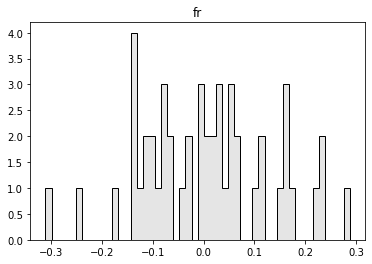

In [3]:
import matplotlib.pyplot as plt 
color = 'black' 
plt.figure() 
plt.title("fr") 
# plot the data 
n, bins, patches = plt.hist(mean_bias, color=color, bins=50, histtype="stepfilled", alpha=0.1) 
plt.hist(mean_bias, color=color, bins=50, histtype="step")

Text(-0.3, 4, 'sigma= 0.127')

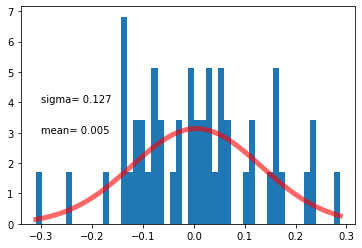

In [4]:
from scipy.stats import norm
(mu, sigma) = norm.fit(mean_bias) 

pdf_x = np.linspace(np.min(mean_bias),np.max(mean_bias),50)
n, bins, patches = plt.hist(mean_bias, bins = 50, density=True,)
plt.plot(pdf_x, norm.pdf(pdf_x, loc = mu, scale = sigma ), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.text(-0.3, 3, "mean= " + str(round(mu, 3)))
plt.text(-0.3, 4, "sigma= " + str(round(sigma, 3)))